In [50]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
import sklearn
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# Column name: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome
df = pd.read_csv('pima_indians_diabetes.csv')
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Renaming columns
df.columns = ["preg", "glu", "pres", "skin", "insu", "bmi", "pedi", "age", "Outcome"]
#X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
X = df[["preg", "glu", "pres", "skin", "insu", "bmi", "pedi", "age"]]
Y = df["Outcome"]

# Split data set to train and test sets -- not used
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=9274)

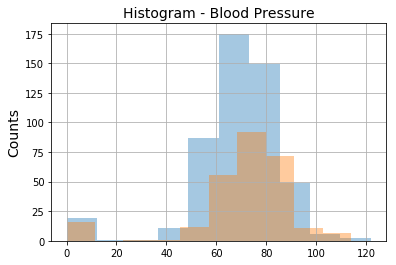

In [8]:
# Data visualization - histogram
df.groupby('Outcome').pres.hist(alpha=0.4)
plt.ylabel('Counts', fontsize=14)
plt.title('Histogram - Blood Pressure', fontsize=14)
plt.show()

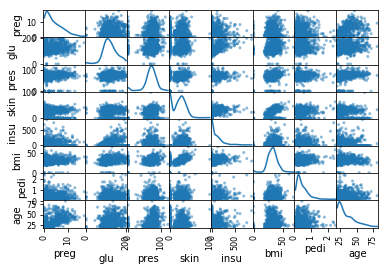

In [13]:
# Data visualization - scatter matrix
pd.plotting.scatter_matrix(X, diagonal='kde')
plt.show()

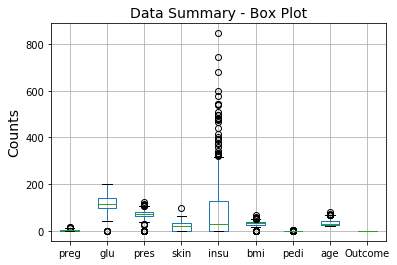

In [15]:
# Data visualization - box plot
df.boxplot()
plt.ylabel('Counts', fontsize=14)
plt.title('Data Summary - Box Plot', fontsize=14)
plt.show()

In [18]:
# Classification model comparison between KNN, SVC, LDA, QDA, Random Forest
print('Model Comparison and Selection: LDA, QDA, SVC, KNN, RandomForest, Naive-Bayes\n')

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('SVC', svm.SVC(kernel='linear', C=1)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('RFC', RandomForestClassifier(n_estimators=100, max_features=3)))
models.append(('NB', GaussianNB()))

print(models)

Model Comparison and Selection: LDA, QDA, SVC, KNN, RandomForest, Naive-Bayes

[('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('QDA', QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)), ('SVC', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')), ('RFC', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
    

In [46]:
# Evaluate each model in a loop
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=764)
    t0 = time()
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    print("The {} model build time {} s".format(name, round(time()-t0, 3)))
    results.append(cv_results)
    names.append(name)
    print("Accuracy of the cross_val_score (cv=5): ", cv_results)
    print("The mean score with 95-percent confidence interval: %0.2f (+/- %0.2f)" 
          % (cv_results.mean(), cv_results.std() * 2))      
    print()

The LDA model build time 0.033 s
Accuracy of the cross_val_score (cv=5):  [0.73376623 0.78571429 0.81818182 0.76470588 0.77777778]
The mean score with 95-percent confidence interval: 0.78 (+/- 0.06)

The QDA model build time 0.025 s
Accuracy of the cross_val_score (cv=5):  [0.70779221 0.76623377 0.79220779 0.67973856 0.71895425]
The mean score with 95-percent confidence interval: 0.73 (+/- 0.08)

The SVC model build time 30.759 s
Accuracy of the cross_val_score (cv=5):  [0.73376623 0.77922078 0.79220779 0.74509804 0.79738562]
The mean score with 95-percent confidence interval: 0.77 (+/- 0.05)

The KNN model build time 0.028 s
Accuracy of the cross_val_score (cv=5):  [0.68831169 0.68831169 0.82467532 0.7124183  0.7124183 ]
The mean score with 95-percent confidence interval: 0.73 (+/- 0.10)

The RFC model build time 1.178 s
Accuracy of the cross_val_score (cv=5):  [0.7012987  0.75974026 0.76623377 0.76470588 0.77124183]
The mean score with 95-percent confidence interval: 0.75 (+/- 0.05)


In [47]:
# Prepare model mean and SE for plotting
model_mean = []
model_std = []

for i in results:
    model_mean.append(i.mean())
    model_std.append(i.std()*2)
    
print(model_mean)
print(model_std)

[0.7760291995586113, 0.7329853153382565, 0.7695356930651048, 0.7252270605211782, 0.7526440879382056, 0.7643154231389525]
[0.05504963190818129, 0.08138570632754036, 0.05106933795398151, 0.10175883376963035, 0.0518671120176379, 0.05900552830321527]


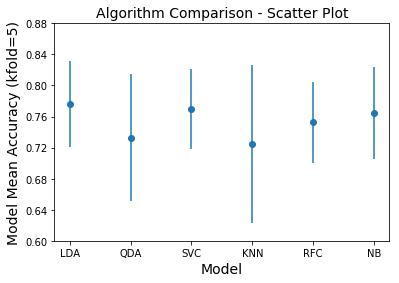

In [48]:
# Scatter plot comparison of model performance 
plt.errorbar(names, model_mean, yerr=model_std, fmt='o')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Model Mean Accuracy (kfold=5)', fontsize=14)
plt.yticks(np.arange(0.6, 0.9, step=0.04))
plt.title('Algorithm Comparison - Scatter Plot', fontsize=14)
plt.show()

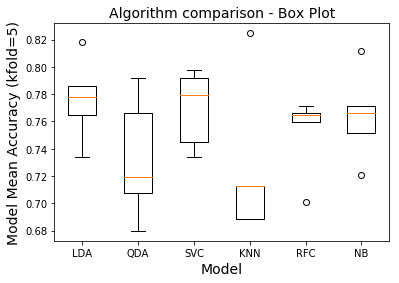

In [49]:
# Algorithm comparison box plot
plt.boxplot(results)
plt.ylabel('Model Mean Accuracy (kfold=5)', fontsize=14)
plt.xticks(np.arange(1,len(names)+1,1),(names))
plt.xlabel('Model', fontsize=14)
plt.title('Algorithm comparison - Box Plot', fontsize=14)
plt.show()